# Project 10 -- Zeru Zhou

**TA Help:** NA


    
**Collaboration:** NA
    
-  Get help from Dr. Ward's video

## Question 1

In [2]:
library(data.table)

In [3]:
elections <- fread("/depot/datamine/data/election/itcont2014.txt", sep="|")

In [4]:
benfords_law_old <- function(digit) {
    if ((digit < 1) | (digit > 9)) {stop("digit is out of range")}
    log((digit+1)/digit)/log(10)

}
benfords_law <- function(v) {
    sapply(v, benfords_law_old)
}
get_starting_digit <- function(transaction_vector) {
    as.numeric(substr(transaction_vector,1,1))
}

In [7]:
T <- table(get_starting_digit(elections$TRANSACTION_AMT)[elections$TRANSACTION_AMT != 0])

Warning message in get_starting_digit(elections$TRANSACTION_AMT):
“NAs introduced by coercion”


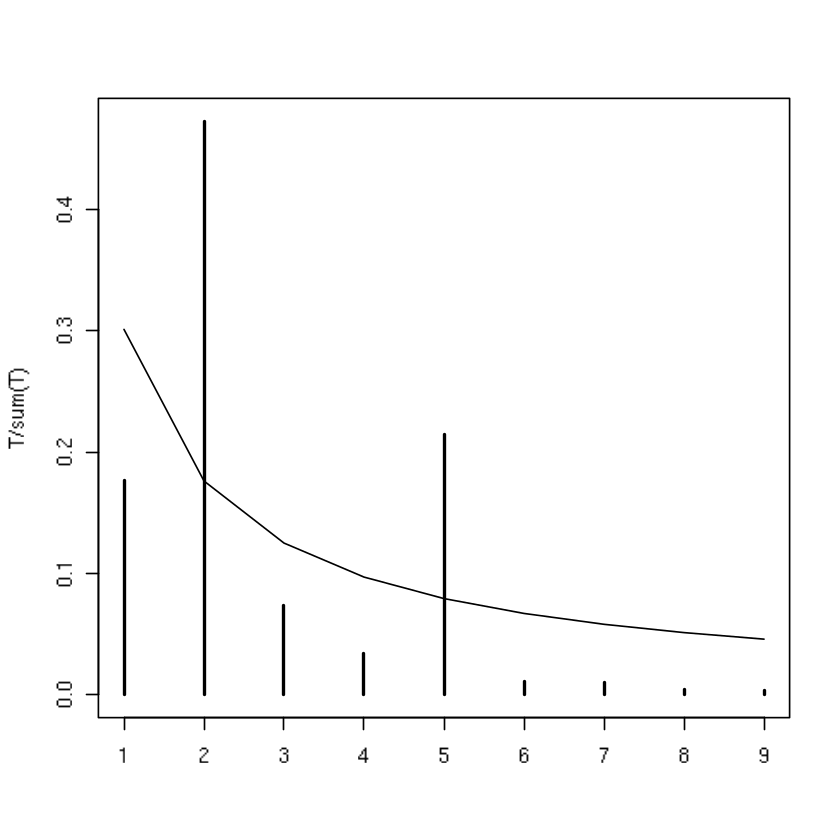

In [14]:
plot(T/sum(T))
lines(benfords_law(1:9))

There are modifications needed because 0 is included in our dataset but benfords law only accept 1 to 9. We need to remove 0 when analyzing.

## Question 2

In [14]:
T <- table(get_starting_digit(elections$TRANSACTION_AMT)[elections$TRANSACTION_AMT != 0])

Warning message in get_starting_digit(elections$TRANSACTION_AMT):
“NAs introduced by coercion”


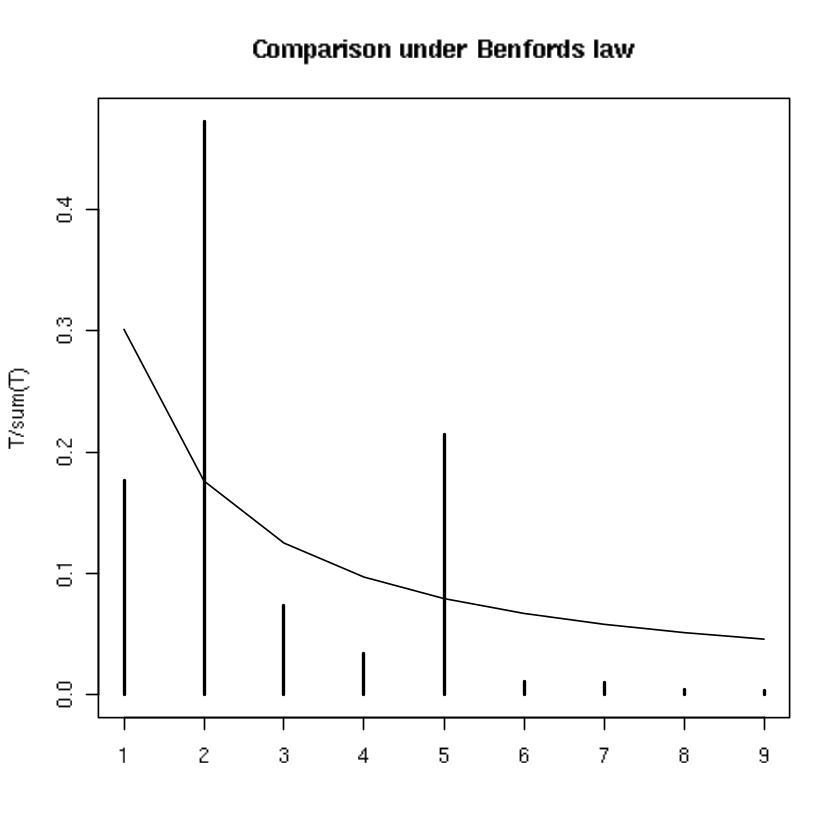

In [8]:
plot(T/sum(T),main="Comparison under Benfords law")
lines(benfords_law(1:9))

This should not be considered as anomalous because except for starting value 2 and 5, the rest of digits are following benfords law. This is because maybe many transactions are like $500, or $2000. Benfords law aimed to analyze real world data and this should be normal case.

## Question 3

In [11]:
compare_to_benfords <- function(values,title="Comparison under Benfords law") {
        T <- table(get_starting_digit(values)[values != 0])
        plot(T/sum(T), main=title)
        lines(benfords_law(1:9))
}

Warning message in get_starting_digit(values):
“NAs introduced by coercion”


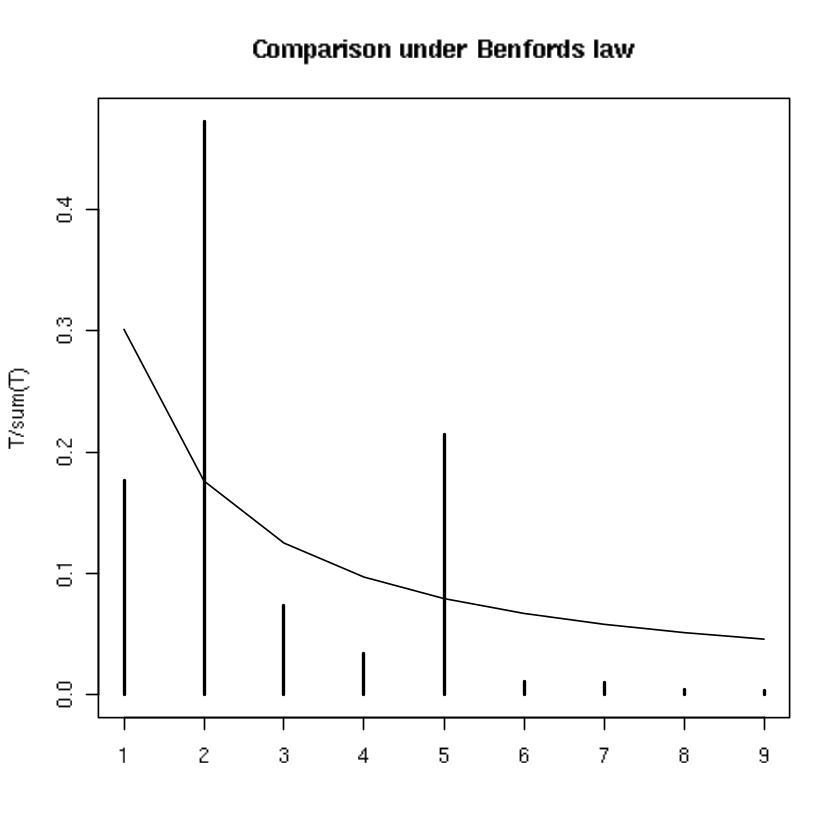

In [5]:
compare_to_benfords(elections$TRANSACTION_AMT)

Here I combined the process together and created function "compare_to_benfords". The result is exactly the same as in question 2.

## Question 4

Warning message in get_starting_digit(values):
“NAs introduced by coercion”
Warning message in get_starting_digit(values):
“NAs introduced by coercion”
Warning message in get_starting_digit(values):
“NAs introduced by coercion”


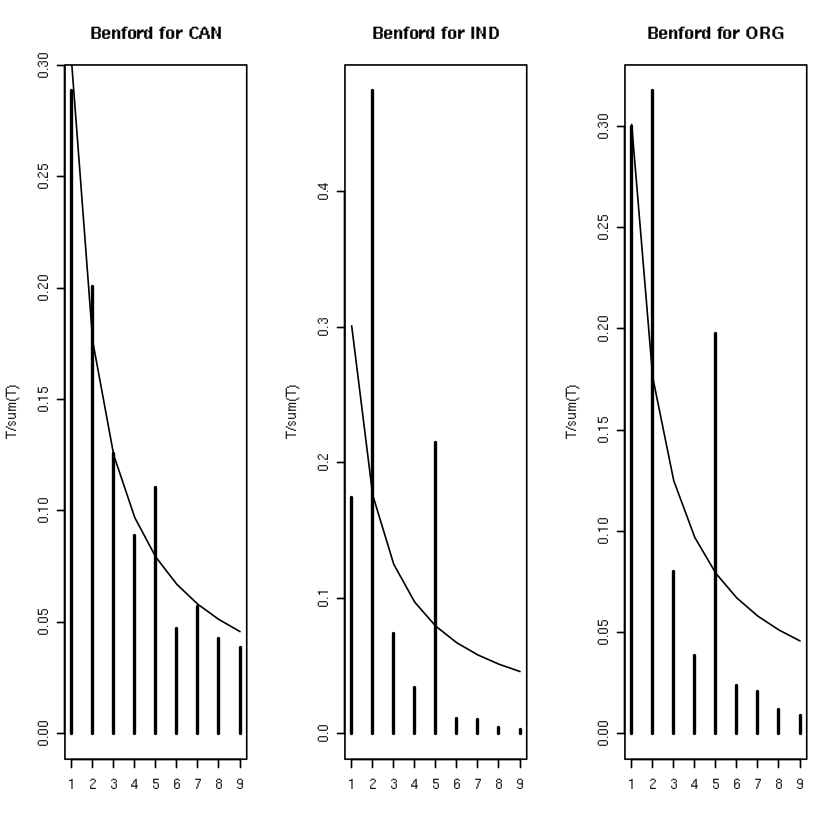

In [10]:
par(mfrow=c(1,3))
compare_to_benfords(elections$TRANSACTION_AMT[elections$ENTITY_TP=="CAN"],"Benford for CAN")
compare_to_benfords(elections$TRANSACTION_AMT[elections$ENTITY_TP=="IND"],"Benford for IND")
compare_to_benfords(elections$TRANSACTION_AMT[elections$ENTITY_TP=="ORG"],"Benford for ORG")

The transaction amount in each entity are combined into one graph, as shown above.

## Question 5

In [14]:
names(elections)

[1] "CMTE_ID"         "AMNDT_IND"       "RPT_TP"          "TRANSACTION_PGI"
 [5] "IMAGE_NUM"       "TRANSACTION_TP"  "ENTITY_TP"       "NAME"           
 [9] "CITY"            "STATE"           "ZIP_CODE"        "EMPLOYER"       
[13] "OCCUPATION"      "TRANSACTION_DT"  "TRANSACTION_AMT" "OTHER_ID"       
[17] "TRAN_ID"         "FILE_NUM"        "MEMO_CD"         "MEMO_TEXT"      
[21] "SUB_ID"

In [5]:
head(elections)

CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
<chr>,<chr>,<chr>,<chr>,<int64>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int64>
C00403477,N,12S,,13961108044,15,IND,"HENCHBARGER, ROBERT",CENTREVILLE,VA,...,MICHAEL BAKER JR,OPERATIONS MANAGER V,2222013,220,,SA11AI.6023,858916,,,4030420131184956987
C00403477,N,12S,,13961108042,15,IND,"BLANKENSHIP, LINDA L",VIENNA,VA,...,MICHAEL BAKER JR,BUSINESS DEVELOPER III,2222013,261,,SA11AI.5977,858916,,,4030420131184956981
C00403477,N,12S,,13961108042,15,IND,"CAMPBELL, JEFFREY J",BADEN,PA,...,MICHAEL BAKER JR,OPERATIONS MANAGER V,2222013,383,,SA11AI.5982,858916,,,4030420131184956982
C00403477,N,12S,,13961108042,15,IND,"CONABOY, MICHAEL J",BURLINGTON,NJ,...,MICHAEL BAKER JR,OPERATIONS MANAGER V,2222013,338,,SA11AI.5987,858916,,,4030420131184956983
C00403477,N,12S,,13961108043,15,IND,"FRARY, ERIC D",MAPLE GLEN,PA,...,MICHAEL BAKER JR,OPERATIONS MANAGER IV,2222013,288,,SA11AI.6003,858916,,,4030420131184956984
C00403477,N,12S,,13961108043,15,IND,"GILL, JEREMY N",ALIQUIPPA,PA,...,MICHAEL BAKER CORP,VP & CHIEF INFORMATION OFFICER,2222013,223,,SA11AI.6009,858916,,,4030420131184956985


Warning message in get_starting_digit(values):
“NAs introduced by coercion”
Warning message in get_starting_digit(values):
“NAs introduced by coercion”
Warning message in get_starting_digit(values):
“NAs introduced by coercion”
Warning message in get_starting_digit(values):
“NAs introduced by coercion”


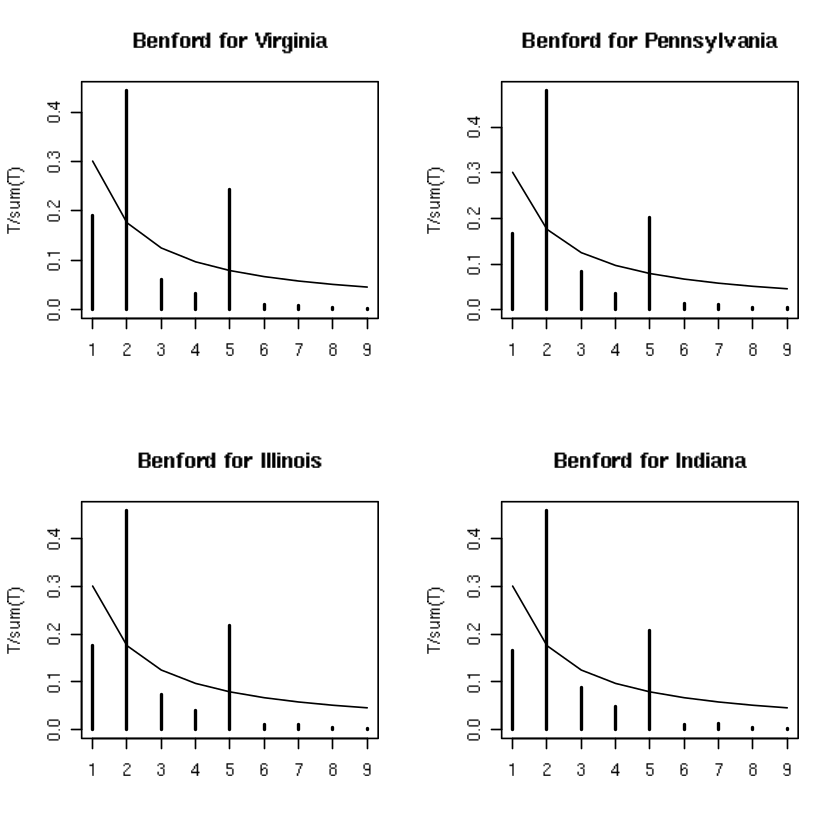

In [13]:
par(mfrow=c(2,2))
compare_to_benfords(elections$TRANSACTION_AMT[elections$STATE=='VA'],"Benford for Virginia")
compare_to_benfords(elections$TRANSACTION_AMT[elections$STATE=='PA'],"Benford for Pennsylvania")
compare_to_benfords(elections$TRANSACTION_AMT[elections$STATE=='IL'],"Benford for Illinois")
compare_to_benfords(elections$TRANSACTION_AMT[elections$STATE=='IN'],"Benford for Indiana")

I compared transaction amount in four states: VA, PA, IL, and IN, with benfords law appears to check anormality. I find that these four states has extremely similiar pattern in the percentage pattern of transaction amount when checking the first digit. Transactions with starting digits 2 and 5 are extremely common in all of the four states. Also, except for these two digits, the others follows the benfords law tightly.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.